# FIFA 21 Players Dataset Cleaning & Transformation

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('data/fifa21 raw data v2.csv')

C:\Users\Tom\AppData\Local\Temp\ipykernel_26920\2242092455.py:6: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/fifa21 raw data v2.csv')


In [66]:
df.head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,...,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,...,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,...,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,...,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,...,High,Medium,5 ★,91,85,86,94,36,59,595


In [67]:
df.shape

(18979, 77)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                18979 non-null  int64 
 1   Name              18979 non-null  object
 2   LongName          18979 non-null  object
 3   photoUrl          18979 non-null  object
 4   playerUrl         18979 non-null  object
 5   Nationality       18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Club              18979 non-null  object
 10  Contract          18979 non-null  object
 11  Positions         18979 non-null  object
 12  Height            18979 non-null  object
 13  Weight            18979 non-null  object
 14  Preferred Foot    18979 non-null  object
 15  BOV               18979 non-null  int64 
 16  Best Position     18979 non-null  object
 17  Joined      

In [69]:
df.describe()

,ID,Age,↓OVA,POT,BOV,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,...,GK Positioning,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY
count,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,...,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000
mean,226403.384794,25.194109,65.718636,71.136414,66.751726,248.938142,49.688392,45.842405,51.942726,58.768112,...,16.217187,16.519627,1595.286949,355.702197,67.453975,53.457031,57.681016,62.875020,49.866221,64.368934
std,27141.054157,4.710520,6.968999,6.114635,6.747193,74.299428,18.131153,19.567081,17.294409,14.519106,...,17.002239,17.854079,269.874789,40.761117,10.677859,13.827425,10.081857,9.927415,16.443213,9.601883
min,41.000000,16.000000,47.000000,47.000000,48.000000,42.000000,6.000000,3.000000,5.000000,7.000000,...,2.000000,2.000000,747.000000,232.000000,25.000000,16.000000,25.000000,25.000000,12.000000,28.000000
25%,210135.000000,21.000000,61.000000,67.000000,62.000000,222.000000,38.000000,30.000000,44.000000,54.000000,...,8.000000,8.000000,1452.000000,327.000000,61.000000,44.000000,51.000000,57.000000,35.000000,58.000000
50%,232418.000000,25.000000,66.000000,71.000000,67.000000,263.000000,54.000000,49.000000,55.000000,62.000000,...,11.000000,11.000000,1627.000000,356.000000,68.000000,56.000000,58.000000,64.000000,53.000000,65.000000
75%,246922.500000,29.000000,70.000000,75.000000,71.000000,297.000000,63.000000,62.000000,64.000000,68.000000,...,14.000000,14.000000,1781.000000,384.000000,75.000000,64.000000,64.000000,69.000000,63.000000,71.000000
max,259216.000000,53.000000,93.000000,95.000000,93.000000,437.000000,94.000000,95.000000,93.000000,94.000000,...,91.000000,90.000000,2316.000000,498.000000,96.000000,93.000000,93.000000,95.000000,91.000000,91.000000


In [70]:
df.duplicated().sum()

0

In [71]:
df.isna().sum()

ID              0
Name            0
LongName        0
photoUrl        0
playerUrl       0
             ... 
PAS             0
DRI             0
DEF             0
PHY             0
Hits         2595
Length: 77, dtype: int64

## Tasks - Data Cleaning & Transformation

1. Remove useless columns.
2. Convert height and weight columns to appropriate data types.
3. Separate the joined columns into year, month, and day columns.
4. Clean and transform the value, wage, and release clause columns into columns of integers. 
5. Remove the unnecessary newline characters.
6. Separate the Team and Contract columns.
7. Some columns have 'star' characters. Strip those columns of these stars and make the columns numerical.
8. Because the metrics within FIFA have a range of 0 to 99, an average of the Sum would represent the stats better. 

1. Drop useless columns.

In [72]:
df = df.drop(["LongName","photoUrl","playerUrl"],axis=1)
df= df.rename(columns={"↓OVA":"OVA"})

2. Convert height and weight columns to appropriate data types

In [73]:
# Convert height
df["Height"]=df["Height"].str.strip("cm")

df["Height"] = df["Height"].str.replace("'", '').str.replace('"', '')
df["Height"] = pd.to_numeric(df["Height"])

In [74]:
df["Height"].unique()

array([170, 187, 188, 181, 175, 184, 191, 178, 193, 185, 199, 173, 168,
       176, 177, 183, 180, 189, 179, 195, 172, 182, 186, 192, 165, 194,
       167, 196, 163, 190, 174, 169, 171, 197, 200, 166,  62, 164, 198,
        63,  65, 511,  64,  61,  60, 510,  59,  56,  57,  54, 201, 158,
       162, 161, 160, 203, 157, 156, 202, 159, 206, 155], dtype=int64)

In [75]:
# Convert weight 
df["Weight"]=df["Weight"].str.strip("kg")
df["Weight"].unique()

array(['72', '83', '87', '70', '68', '80', '71', '91', '73', '85', '92',
       '69', '84', '96', '81', '82', '75', '86', '89', '74', '76', '64',
       '78', '90', '66', '60', '94', '79', '67', '65', '59', '61', '93',
       '88', '97', '77', '62', '63', '95', '100', '58', '183lbs',
       '179lbs', '172lbs', '196lbs', '176lbs', '185lbs', '170lbs',
       '203lbs', '168lbs', '161lbs', '146lbs', '130lbs', '190lbs',
       '174lbs', '148lbs', '165lbs', '159lbs', '192lbs', '181lbs',
       '139lbs', '154lbs', '157lbs', '163lbs', '98', '103', '99', '102',
       '56', '101', '57', '55', '104', '107', '110', '53', '50', '54',
       '52'], dtype=object)

In [76]:
def lbs_to_kg(x):
    if "lbs" in x: 
        lbs = x.replace("lbs","")
        kilograms = round(int(lbs)/2.2, 0)
        return int(kilograms)
    else:
        return int(x)

In [77]:
df["Weight"] = df["Weight"].apply(lbs_to_kg)
df["Weight"].unique()

array([ 72,  83,  87,  70,  68,  80,  71,  91,  73,  85,  92,  69,  84,
        96,  81,  82,  75,  86,  89,  74,  76,  64,  78,  90,  66,  60,
        94,  79,  67,  65,  59,  61,  93,  88,  97,  77,  62,  63,  95,
       100,  58,  98, 103,  99, 102,  56, 101,  57,  55, 104, 107, 110,
        53,  50,  54,  52], dtype=int64)

3. Separate the joined columns into year, month, and day columns


In [78]:
from datetime import datetime

df['Joined'] = pd.to_datetime(df['Joined'], format='%b %d, %Y')

In [79]:
df['Joined']

0       2004-07-01
1       2018-07-10
2       2014-07-16
3       2015-08-30
4       2017-08-03
           ...    
18974   2018-07-13
18975   2020-08-01
18976   2019-03-08
18977   2020-09-22
18978   2019-07-29
Name: Joined, Length: 18979, dtype: datetime64[ns]

4. Clean and transform the value, wage, and release clause columns into columns of integers. 

In [80]:
def money(x):
    if "€" in x:
        x=x.replace("€","")
    if "M" in x:
        x=x.replace("M","")
        x=float(x)*1000000
        return int(x)
    
    elif "K" in x:
        x = x.replace("K","")
        x = float(x)*1000
        return int(x)
    else:
        return int(x)
    
df["Value"]=df["Value"].apply(money)
df["Wage"]=df["Wage"].apply(money)
df["Release Clause"]=df["Release Clause"].apply(money)

5. Remove the unnecessary newline characters.

In [81]:
df["Club"]=df["Club"].str.strip("\n")
df["Hits"]=df["Hits"].str.strip("\n")

6. Separate the Team and Contract columns.

In [82]:
def type(x):
    if "Free" in x:
        return "Free"
    if "Loan" in x:
        return "Loan"
    if "~" in x:
        return "Contract"
    else:
        return pd.NA
    
def start_time_contract(x):
    if "~" in x:
        return int(x[:4])
    if "Loan" in x:
        x=x.strip("On Loan")
        x=datetime.strptime(x,"%b %d, %Y")
        return x.date()
    else:
        return pd.NA
    
def end_time_contract(type,contract,loan):
    if type == "Contract":
        return int(contract[-4:])
    if type == "Loan":
        loan = datetime.strptime(loan, "%b %d, %Y")
        return loan.date()
    else:
        return pd.NA
    
df["Contract Type"] = df["Contract"].apply(type)
df["Start Year"] = df["Contract"].apply(start_time_contract)
df["End Year"] = df.apply(lambda row: end_time_contract(row["Contract Type"],row["Contract"], row["Loan Date End"]), axis = 1)

In [83]:
df=df[list(df.columns[:7])+list(df.columns[-3:])+list(df.columns[8:-3])]
df=df.drop(columns=["Loan Date End"])

7. Some columns have 'star' characters. Strip those columns of these stars and make the columns numerical.

In [84]:
df["W/F"]=df["W/F"].str.replace("★","")
df["SM"]=df["SM"].str.replace("★","")
df["IR"]=df["IR"].str.replace("★","")


8. Because the metrics within FIFA have a range of 0 to 99, an average of the Sum would represent the stats better. 

In [85]:
df["Attacking"]=round(df["Attacking"]/5,0)
df["Attacking"]=df["Attacking"].astype("int64")

df["Skill"]=df["Skill"]/5
df["Skill"]=df["Skill"].astype("int64")


df["Movement"]=df["Movement"]/5
df["Movement"]=df["Movement"].astype("int64")


df["Power"]=df["Power"]/5
df["Power"]=df["Power"].astype("int64")


df["Mentality"]=df["Mentality"]/6
df["Mentality"]=df["Mentality"].astype("int64")

df["Defending"]=df["Defending"]/3
df["Defending"]=df["Defending"].astype("int64")

df["Goalkeeping"] = df["Goalkeeping"]/5
df["Goalkeeping"] = df["Goalkeeping"].astype("int64")

### Clean Dataset

In [86]:
df.to_csv('data/clean_fifa21_data.csv',index=False)

## Analysis/Visualizing Relationships

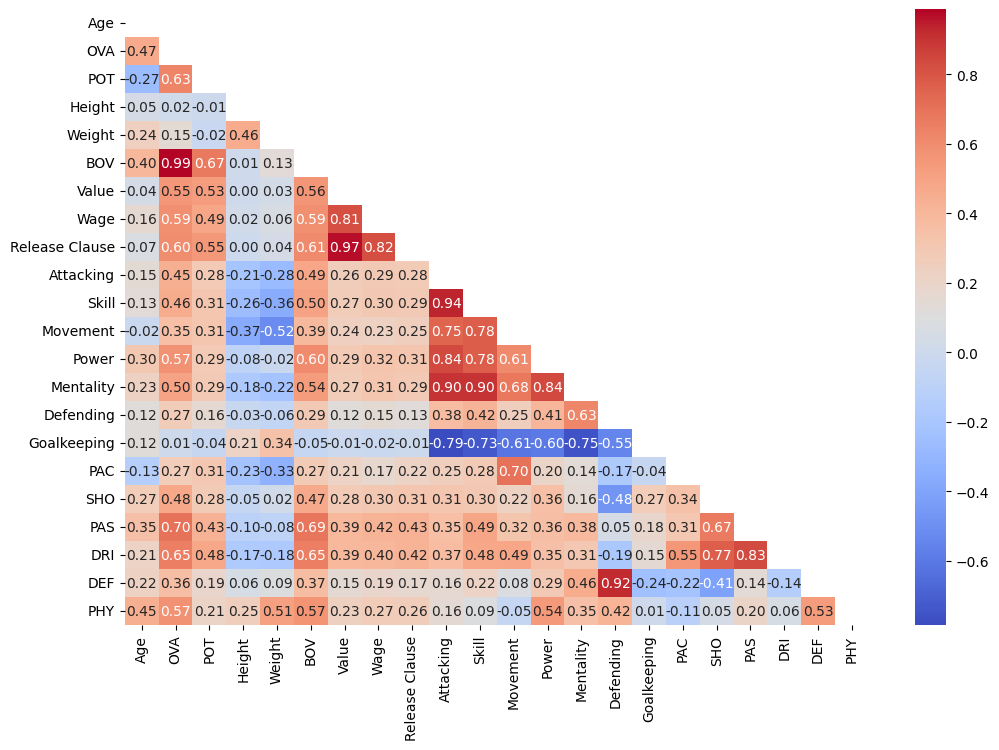

In [87]:
df_skills = df[['Age','OVA','POT','Height','Weight','BOV','Value','Wage','Release Clause','Attacking','Skill', 'Movement','Power','Mentality','Defending','Goalkeeping','PAC','SHO','PAS','DRI','DEF','PHY']]

corr_matrix = df_skills.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(12, 8))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", mask=mask)

plt.show()

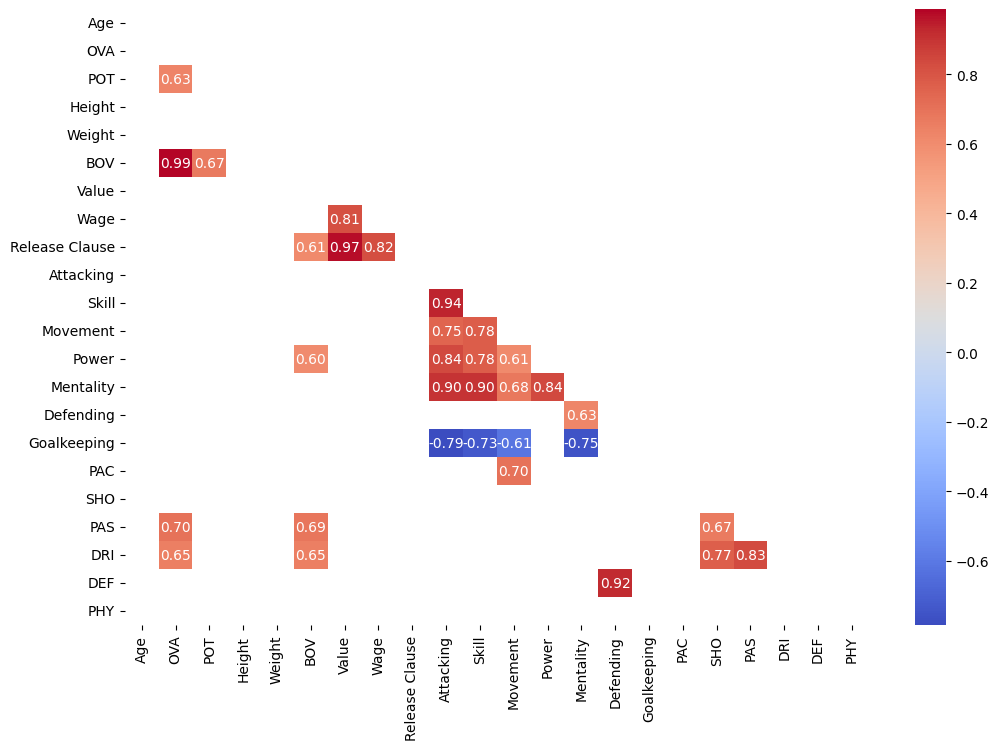

In [88]:
high_corr = corr_matrix[(corr_matrix > 0.6) | (corr_matrix < -0.6)]

mask = np.triu(np.ones_like(high_corr, dtype=bool))

plt.figure(figsize=(12, 8))

sns.heatmap(high_corr, annot=True, fmt=".2f", cmap="coolwarm", mask=mask)

plt.show()


Note that PAS and DRI relates strongest with a player's performance (OVA)

#### Descriptive Statistics 

In [137]:
mean_rating = df['OVA'].mean()
median_rating = df['OVA'].median()
std_deviation = df['OVA'].std()
quartiles = df['OVA'].quantile([0.25, 0.5, 0.75])


print('Mean rating is', mean_rating,
      'Median rating is', median_rating,
      'Std deviation is', std_deviation,
      'Quartilies is', quartiles)

Mean rating is 65.71863638758629 Median rating is 66.0 Std deviation is 6.968998988533957 Quartilies is 0.25    61.0
0.50    66.0
0.75    70.0
Name: OVA, dtype: float64


#### Overall Rating Distribtion

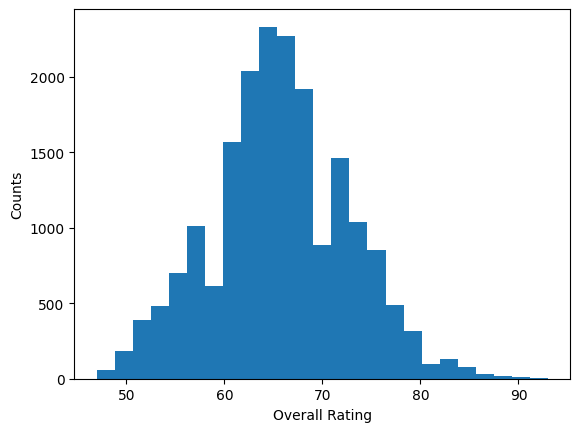

In [89]:
plt.hist(df["OVA"], bins = 25)
plt.ylabel("Counts")
plt.xlabel("Overall Rating")
plt.show()

#### Top Rated Players

In [128]:
top_rated_players = df.sort_values(by='OVA', ascending=False).head(10)
top_rated_players

,ID,Name,Nationality,Age,OVA,POT,Club,Contract Type,Start Year,End Year,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Argentina,33,93,93,FC Barcelona,Contract,2004,2021,...,Medium,Low,5,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,Portugal,35,92,92,Juventus,Contract,2018,2022,...,High,Low,5,89,93,81,89,35,77,562
2,200389,J. Oblak,Slovenia,27,91,93,Atlético Madrid,Contract,2014,2023,...,Medium,Medium,3,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Belgium,29,91,91,Manchester City,Contract,2015,2023,...,High,High,4,76,86,93,88,64,78,207
4,190871,Neymar Jr,Brazil,28,91,91,Paris Saint-Germain,Contract,2017,2022,...,High,Medium,5,91,85,86,94,36,59,595
5,188545,R. Lewandowski,Poland,31,91,91,FC Bayern München,Contract,2014,2023,...,High,Medium,4,78,91,78,85,43,82,248
9,192448,M. ter Stegen,Germany,28,90,93,FC Barcelona,Contract,2014,2022,...,Medium,Medium,3,88,85,88,90,45,88,130
10,203376,V. van Dijk,Netherlands,28,90,91,Liverpool,Contract,2018,2023,...,Medium,Medium,3,76,60,71,71,91,86,321
11,208722,S. Mané,Senegal,28,90,90,Liverpool,Contract,2016,2023,...,High,Medium,3,94,85,80,90,44,76,189
8,231747,K. Mbappé,France,21,90,95,Paris Saint-Germain,Contract,2018,2022,...,High,Low,3,96,86,78,91,39,76,1.6K


#### Ratings by Position

In [141]:
position_ratings = df.groupby('Positions')['OVA'].mean().reset_index()
position_ratings

,Positions,OVA
0,CAM,62.232653
1,"CAM, CDM",65.846154
2,"CAM, CDM, CM",65.166667
3,"CAM, CDM, LM",62.000000
4,"CAM, CF",66.434783
...,...,...
635,"ST, RW, CM",54.000000
636,"ST, RW, LM",65.000000
637,"ST, RW, LW",65.682927
638,"ST, RW, RM",69.000000


#### Filter Players by Best Position

In [160]:
forward_positions = ["LW", "CF", "RW", "ST"]
midfielder_positions = ["LM", "CM", "RM", "CAM"]
defender_positions = ["LB", "CB", "RB", "LWB", "RWB", "CDM"]
goalkeeper_positions = ["GK"]

forward_players = df[df['Best Position'].isin(forward_positions)]
midfielder_players = df[df['Best Position'].isin(midfielder_positions)]
defender_players = df[df['Best Position'].isin(defender_positions)]
goalkeeper_players = df[df['Best Position'].isin(goalkeeper_positions)]

#### Ratings vs Age

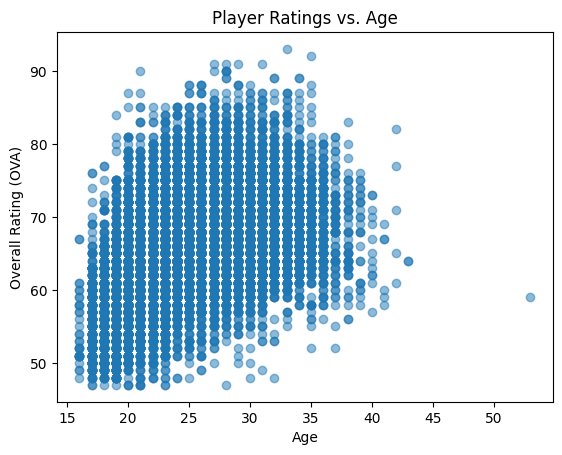

In [143]:
plt.scatter(df['Age'], df['OVA'], alpha=0.5,)
plt.xlabel('Age')
plt.ylabel('Overall Rating (OVA)')
plt.title('Player Ratings vs. Age')
plt.show()


#### Does Height and Weight affect performance? 


In [190]:
correlation_height = df['OVA'].corr(df['Height'])
correlation_weight = df['OVA'].corr(df['Weight'])

print(correlation_height)
print(correlation_weight)

0.017367374927677797
0.14797339981493474


Low correlation coefficients suggests a weak relationship between height/weight and performance(OVA).

#### Countries with Most Players

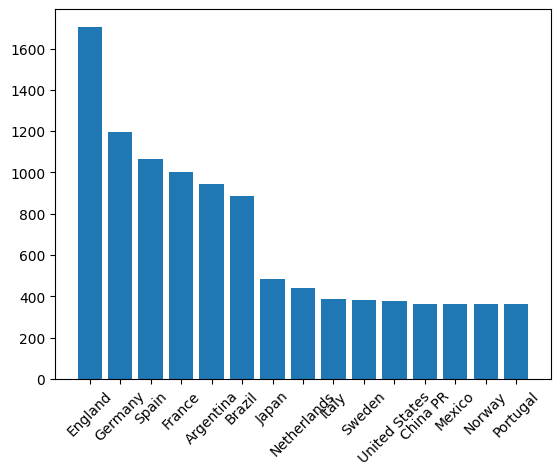

In [124]:
s=df.groupby("Nationality").size().reset_index(name="Count").sort_values(by="Count", ascending=False)
s=s[0:15]
plt.bar(s["Nationality"], s["Count"])
plt.xticks(rotation=45)
plt.show()

#### Countries with Top 100 Players 

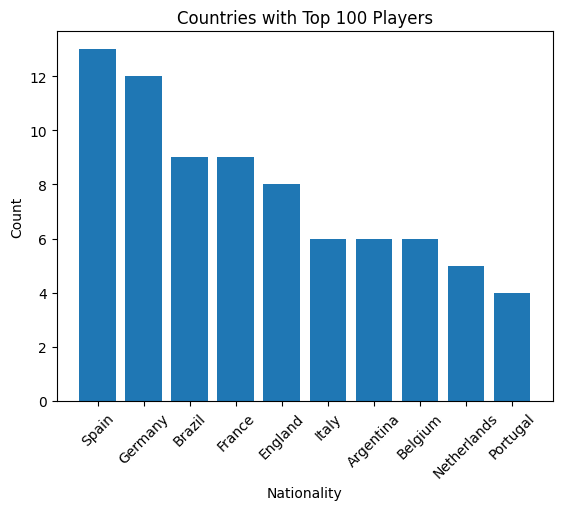

In [185]:
df100 = df.sort_values(by="OVA",ascending=False)
df100 = df100[0:100]

nationality_counts = df100.groupby('Nationality').size().reset_index(name="Count")
nationality_counts = nationality_counts.sort_values(by="Count", ascending=False)

nationality_counts = nationality_counts[0:10]

plt.bar(nationality_counts['Nationality'],nationality_counts["Count"])
plt.xlabel("Nationality")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.title('Countries with Top 100 Players')
plt.show()

#### Ratings over Time

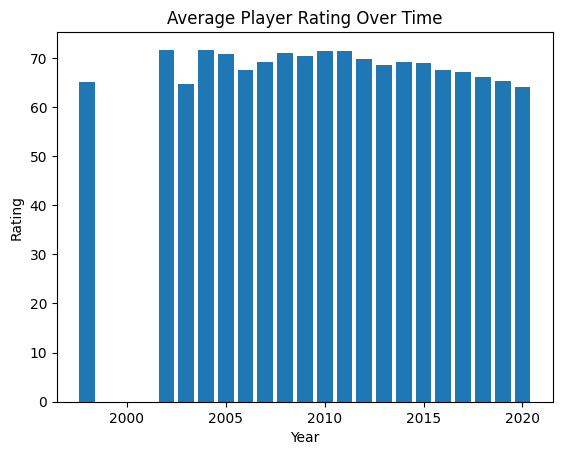

In [184]:
df['Joined Year'] = df['Joined'].dt.year

yearly_mean_ratings = df.groupby('Joined Year')['OVA'].mean()
plt.bar(yearly_mean_ratings.index, yearly_mean_ratings.values)
plt.ylabel('Rating')
plt.xlabel('Year')
plt.title('Average Player Rating Over Time')
plt.show()


#### Which players are highly valuable but still underpaid (on low wages)? 

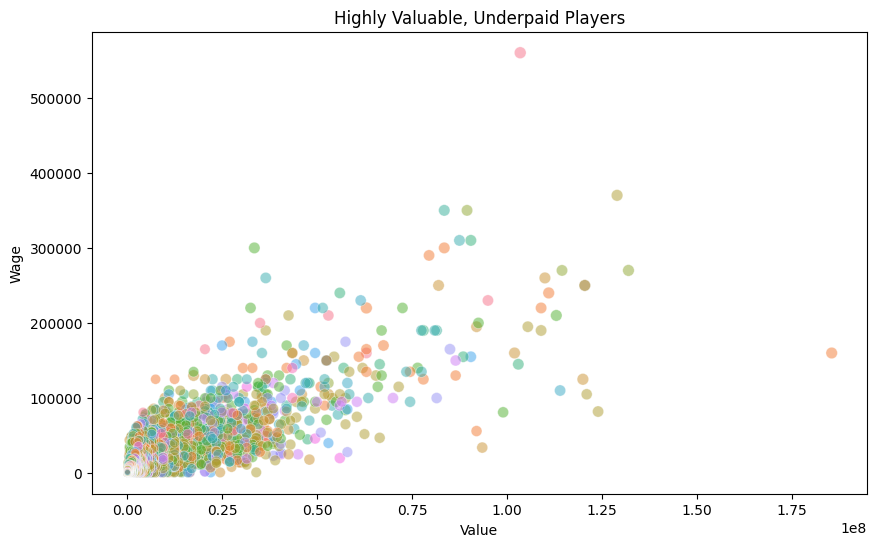

In [182]:
df['Value for Wage'] = df['Value'] / df['Wage']

# Define a threshold to identify players who are highly valuable but underpaid
value_wage_threshold = 10  # Adjust this threshold as needed

# Filter players based on the threshold
underpaid_players = df[df['Value for Wage'] > value_wage_threshold]

# Create a scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=underpaid_players, y="Wage", x="Value", hue="Best Position", size="OVA", alpha=0.5, legend=False)
plt.xlabel('Value')
plt.ylabel('Wage')
plt.title('Highly Valuable, Underpaid Players')
plt.show()


In [200]:
sorted_players = df.sort_values(by='Value for Wage', ascending=False)

sorted_players.head(15)


,ID,Name,Nationality,Age,OVA,POT,Club,Contract Type,Start Year,End Year,...,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Value for Wage
373,244369,V. Tsygankov,Ukraine,22,80,86,Dynamo Kyiv,Contract,2015,2023,...,Medium,1,85,73,78,80,45,57,262,34000.000000
372,241671,D. Livaković,Croatia,25,80,85,Dinamo Zagreb,Contract,2015,2023,...,Medium,1,80,78,74,82,55,79,83,27222.222222
1354,244380,V. Mykolenko,Ukraine,21,76,84,Dynamo Kyiv,Contract,2017,2025,...,Medium,1,78,44,62,57,73,63,199,22857.142857
346,201119,Ismaily,Brazil,30,81,81,Shakhtar Donetsk,Contract,2013,2023,...,Medium,1,82,64,74,81,75,75,25,22000.000000
697,244467,O. Kolář,Czech Republic,25,78,83,SK Slavia Praha,Contract,2018,2024,...,Medium,1,75,73,81,80,58,79,50,19411.764706
2198,246618,A. Hložek,Czech Republic,17,74,87,Sparta Praha,Contract,2019,2022,...,Medium,1,77,71,68,75,32,73,602,19000.000000
1671,247641,Tete,Brazil,20,75,86,Shakhtar Donetsk,Contract,2019,2023,...,Medium,1,83,67,69,79,29,58,253,16666.666667
744,225997,B. Verbič,Slovenia,26,78,79,Dynamo Kyiv,Contract,2018,2022,...,Medium,1,83,72,72,80,43,73,24,16500.000000
588,212442,José Sá,Portugal,27,79,81,Olympiacos CFP,Contract,2019,2023,...,Medium,1,79,78,64,81,45,76,25,16000.000000
610,206413,T. Stepanenko,Ukraine,30,79,79,Shakhtar Donetsk,Contract,2010,2022,...,High,1,67,61,71,68,79,79,16,14500.000000
